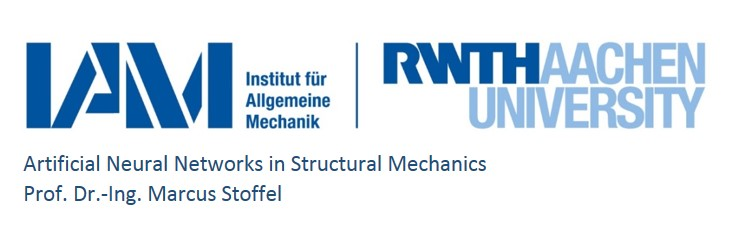

# Exercise 8 - 17th Dec 2020

## Tensorflow Tutorial

### Classes and Objects

In [1]:
class Student:
    
    #Initializer
    def __init__(self, name, course, gpa):
        
        self.name = name
        self.course = course
        self.gpa = gpa
        
    def print_student_details(self):
        
        print('Name: {}'.format(self.name))
        print('Course: {}'.format(self.course))
        print('GPA: {}'.format(self.gpa))

In [2]:
#Creating objects
s1 = Student('Bob', 'came', '1,0')
s2 = Student('Alice', 'came', '1,7')

In [3]:
#Display student details
s1.print_student_details()

Name: Bob
Course: came
GPA: 1,0


### Building a layer class

In [4]:
import numpy as np

In [5]:
np.random.seed(42)

In [6]:
class layer():
    
    def __init__(self, units):
        self.units = units
        
        #Create weight shapes
        #Assuming previous layer has 3 units
        w_shape = (self.units, 3)
        b_shape = (self.units, 1)
        
        #Creating weights
        self.w = np.random.uniform(low=-1, high=1, size=w_shape)
        self.b = np.random.uniform(low=-1, high=1, size=b_shape)
    
    def call(self, x):
        
        #Calculating the weighted sum
        self.z = np.matmul(self.w, x) + self.b
        
        #Calculating activation
        self.a = np.tanh(self.z)
        
        return self.a

In [7]:
#Creating a layer object
l1 = layer(5)

In [8]:
#Creating input vector to this layer
inp = np.random.uniform(low=-1, high=1, size=(3, 1))
print(inp)

[[ 0.22370579]
 [-0.72101228]
 [-0.4157107 ]]


In [9]:
#Forward pass through l1
l1.call(inp)

array([[-0.91079163],
       [ 0.40921546],
       [-0.64125942],
       [ 0.25206804],
       [ 0.38893836]])

In [10]:
#Print layer weights
print('weights')
print(l1.w)
print()
print('bias')
print(l1.b)

weights
[[-0.25091976  0.90142861  0.46398788]
 [ 0.19731697 -0.68796272 -0.68801096]
 [-0.88383278  0.73235229  0.20223002]
 [ 0.41614516 -0.95883101  0.9398197 ]
 [ 0.66488528 -0.57532178 -0.63635007]]

bias
[[-0.63319098]
 [-0.39151551]
 [ 0.04951286]
 [-0.13610996]
 [-0.41754172]]


### Introduction to Tensorflow

In [11]:
import tensorflow as tf

In [12]:
a = tf.constant([[1, 2], [3, 4]])
a

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [13]:
b = tf.Variable([[1, 2], [3, 4]], dtype=tf.float64)
b

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

In [14]:
c = tf.zeros((4, 4))
c

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [15]:
d = tf.random.uniform(shape=(2, 2), dtype=tf.float64)
d

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.47758625, 0.14340687],
       [0.03983715, 0.8206911 ]])>

In [16]:
tf.matmul(b, d)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.55726056, 1.78478907],
       [1.59210736, 3.71298501]])>

### Recreating layer class with tensorflow

In [17]:
tf.random.set_seed(42)

In [18]:
class layer_tf:
    
    def __init__(self, units):
        self.units = units
        
        #Create weight shapes
        #Assuming previous layer has 3 units
        w_shape = (self.units, 3)
        b_shape = (self.units, 1)
        
        #Creating initializer objects
        w_init = tf.initializers.RandomUniform()
        b_init = tf.initializers.RandomUniform()
        
        #Generating initial values
        w_init_val = w_init(shape=w_shape, dtype=tf.float32)
        b_init_val = b_init(shape=b_shape, dtype=tf.float32)
        
        #Creating weights
        self.w = tf.Variable(initial_value=w_init_val, trainable=True)
        self.b = tf.Variable(initial_value=b_init_val, trainable=True)
    
    def call(self, x):
        
        #Calculating the weighted sum
        self.z = tf.matmul(self.w, x) + self.b
        
        #Calculating activation
        self.a = tf.tanh(self.z)
        
        return self.a

In [19]:
l2 = layer_tf(5)

In [20]:
#Creating input vector to this layer
inp = np.random.uniform(low=-1, high=1, size=(3, 1))
print(inp)

[[-0.26727631]
 [-0.08786003]
 [ 0.57035192]]


In [21]:
#Forward pass through l2
l2.call(inp)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[ 0.00651812],
       [ 0.01402634],
       [ 0.01779846],
       [-0.0030361 ],
       [ 0.03673593]], dtype=float32)>

### Importing Libraries

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

### Data Generation

In [23]:
#Generating data points
xx = np.linspace(0, 3, 500)
yy = xx**2+4

In [24]:
#Verifying shape
xx.shape

(500,)

In [25]:
#Explicitly setting shape to be 2D
xx = np.reshape(xx, newshape=(500, 1))
yy = np.reshape(yy, newshape=(500, 1))

In [26]:
xx.shape

(500, 1)

### Visualisation of training data

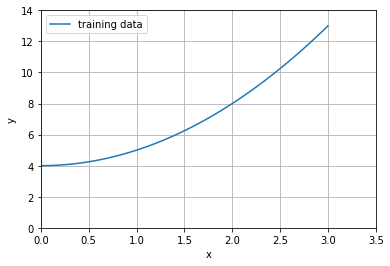

In [27]:
#Plot commands
plt.plot(xx, yy, label='training data')

#Plot formatting
plt.xlim(0, 3.5)
plt.ylim(0, 14)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Normalization - Manual

In [28]:
x_mean = xx.mean()
x_max = xx.max()
x_min = xx.min()

y_mean = yy.mean()
y_max = yy.max()
y_min = yy.min()

In [29]:
x_feed = (xx-x_mean)/(x_max-x_min)
y_feed = (yy-y_mean)/(y_max-y_min)

In [30]:
np.max(y_feed)

0.6663326653306614

### Neural Network Model

In [31]:
#Creating a model object
model = Sequential()

#Creating an output layer
model.add(Input(shape=(1,)))

#Adding hidden layers to the object
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=10, activation='tanh'))

#Adding output layer
model.add(Dense(units=1, activation='tanh'))

In [32]:
#Compile the model
model.compile(optimizer='sgd', loss='mse')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(x=x_feed, y=y_feed, epochs=2000)

Epoch 1/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.1597
Epoch 2/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.1205
Epoch 3/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0912
Epoch 4/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 5/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 6/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0411
Epoch 7/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 8/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 9/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 10/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 11/2000
16/16 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 12/2000
16/16 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 13/2000
16/16 [====

16/16 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 102/2000
16/16 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 103/2000
16/16 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 104/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 105/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 106/2000
16/16 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 107/2000
16/16 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 108/2000
16/16 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 109/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 110/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 111/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 112/2000
16/16 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 113/2000
16/1

16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 298/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 299/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 300/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 301/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 302/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 303/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 304/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 305/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 306/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 307/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 308/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 309/2000
16/1

16/16 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 494/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 495/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 496/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 497/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 498/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 499/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 500/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 501/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 502/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 503/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 504/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 505/2000
16/1

16/16 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 690/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 691/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 692/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 693/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 694/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 695/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 696/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 697/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 698/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 699/2000
16/16 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 700/2000
16/16 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 701/2000
16/1

16/16 [==============================] - 0s 2ms/step - loss: 6.2292e-04
Epoch 882/2000
16/16 [==============================] - 0s 2ms/step - loss: 6.1966e-04
Epoch 883/2000
16/16 [==============================] - 0s 2ms/step - loss: 6.1640e-04
Epoch 884/2000
16/16 [==============================] - 0s 2ms/step - loss: 6.1355e-04
Epoch 885/2000
16/16 [==============================] - 0s 2ms/step - loss: 6.1054e-04
Epoch 886/2000
16/16 [==============================] - 0s 2ms/step - loss: 6.0781e-04
Epoch 887/2000
16/16 [==============================] - 0s 2ms/step - loss: 6.0531e-04
Epoch 888/2000
16/16 [==============================] - 0s 2ms/step - loss: 6.0285e-04
Epoch 889/2000
16/16 [==============================] - 0s 2ms/step - loss: 5.9930e-04
Epoch 890/2000
16/16 [==============================] - 0s 2ms/step - loss: 5.9666e-04
Epoch 891/2000
16/16 [==============================] - 0s 2ms/step - loss: 5.9409e-04
Epoch 892/2000
16/16 [==============================] - 0s

16/16 [==============================] - 0s 2ms/step - loss: 2.8916e-04
Epoch 1069/2000
16/16 [==============================] - 0s 2ms/step - loss: 2.8799e-04
Epoch 1070/2000
16/16 [==============================] - 0s 2ms/step - loss: 2.8734e-04
Epoch 1071/2000
16/16 [==============================] - 0s 2ms/step - loss: 2.8653e-04
Epoch 1072/2000
16/16 [==============================] - 0s 2ms/step - loss: 2.8523e-04
Epoch 1073/2000
16/16 [==============================] - 0s 2ms/step - loss: 2.8439e-04
Epoch 1074/2000
16/16 [==============================] - 0s 2ms/step - loss: 2.8354e-04
Epoch 1075/2000
16/16 [==============================] - 0s 2ms/step - loss: 2.8243e-04
Epoch 1076/2000
16/16 [==============================] - 0s 2ms/step - loss: 2.8169e-04
Epoch 1077/2000
16/16 [==============================] - 0s 2ms/step - loss: 2.8067e-04
Epoch 1078/2000
16/16 [==============================] - 0s 2ms/step - loss: 2.7974e-04
Epoch 1079/2000
16/16 [=========================

16/16 [==============================] - 0s 2ms/step - loss: 1.8669e-04
Epoch 1255/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.8606e-04
Epoch 1256/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.8594e-04
Epoch 1257/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.8557e-04
Epoch 1258/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.8525e-04
Epoch 1259/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.8512e-04
Epoch 1260/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.8471e-04
Epoch 1261/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.8472e-04
Epoch 1262/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.8413e-04
Epoch 1263/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.8392e-04
Epoch 1264/2000
16/16 [==============================] - 0s 1ms/step - loss: 1.8370e-04
Epoch 1265/2000
16/16 [=========================

16/16 [==============================] - 0s 2ms/step - loss: 1.5550e-04
Epoch 1441/2000
16/16 [==============================] - 0s 1ms/step - loss: 1.5527e-04
Epoch 1442/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.5511e-04
Epoch 1443/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.5512e-04
Epoch 1444/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.5518e-04
Epoch 1445/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.5495e-04
Epoch 1446/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.5483e-04
Epoch 1447/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.5480e-04
Epoch 1448/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.5488e-04
Epoch 1449/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.5470e-04
Epoch 1450/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.5454e-04
Epoch 1451/2000
16/16 [=========================

Epoch 1626/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.4303e-04
Epoch 1627/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.4301e-04
Epoch 1628/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.4293e-04
Epoch 1629/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.4291e-04
Epoch 1630/2000
16/16 [==============================] - 0s 1ms/step - loss: 1.4282e-04
Epoch 1631/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.4303e-04
Epoch 1632/2000
16/16 [==============================] - 0s 1ms/step - loss: 1.4266e-04
Epoch 1633/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.4273e-04
Epoch 1634/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.4271e-04
Epoch 1635/2000
16/16 [==============================] - 0s 4ms/step - loss: 1.4296e-04
Epoch 1636/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.4271e-04
Epoch 1637/2000
16/16 [=========

16/16 [==============================] - 0s 2ms/step - loss: 1.3564e-04
Epoch 1811/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.3554e-04
Epoch 1812/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.3538e-04
Epoch 1813/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.3532e-04
Epoch 1814/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.3576e-04
Epoch 1815/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.3536e-04
Epoch 1816/2000
16/16 [==============================] - 0s 1ms/step - loss: 1.3531e-04
Epoch 1817/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.3540e-04
Epoch 1818/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.3532e-04
Epoch 1819/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.3544e-04
Epoch 1820/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.3520e-04
Epoch 1821/2000
16/16 [=========================

16/16 [==============================] - 0s 2ms/step - loss: 1.2952e-04
Epoch 1997/2000
16/16 [==============================] - 0s 1ms/step - loss: 1.2953e-04
Epoch 1998/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.2949e-04
Epoch 1999/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.2957e-04
Epoch 2000/2000
16/16 [==============================] - 0s 2ms/step - loss: 1.2940e-04


In [35]:
#Predicting normalized network output
y_predict_norm = model.predict(x_feed)

In [36]:
#Denormalizing network output
y_predict = y_predict_norm*(y_max-y_min) + y_mean

(0.0, 14.0)

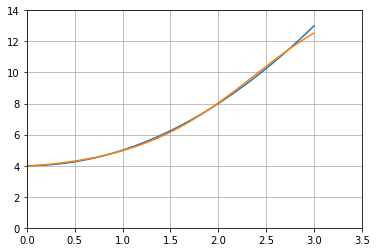

In [37]:
#Plotting
plt.plot(xx, yy, label='training data')
plt.plot(xx, y_predict[:, 0])
plt.grid()
plt.xlim(0, 3.5)
plt.ylim(0, 14)